<a href="https://colab.research.google.com/github/sileeee/python-data_science_study/blob/master/datascience_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Decision Tree
의사결정나무라고도 불리는 Decision Tree는 그 이름처럼 의사를 결정하는데 도움을 주는 나무 모양의 예측 모델이다.
- 일반적으로 빠르게 정답에 도달할 수록 더 우수한 트리라고 볼 수 있습니다.
(항상 더 높은 성공률을 보장하지는 않음)

### 카테고리 특성을 지닌 데이터가 들어 왔을 때 코드 상에서는 Decision Tree를 구성하는 방법


In [1]:
# 순서대로 [고양이/펭귄/닭/타조/참새]의 데이터
data = {
    'name': ['고양이', '펭귄', '닭', '타조', '참새'],
    'wing': [False, True, True, True, True],
    'weight': ['light', 'heavy', 'light', 'heavy', 'light'],
    'density': ['low', 'high', 'high', 'high', 'low'],
    'fly': [False, False, False, False, True]
}

In [2]:
# 코드작성이 끝나면 target_index를 0부터 4까지 변경하면서 실행해보세요.

print('고양이는 날개가 있을까?', data['wing'][0] )
print('닭은 날개가 있을까?', data['wing'][2] )

# 펭귄의 날개,무게,골밀도,비행가능여부 정보를 모두 보여주기
print(data['wing'][1],
      data['weight'][1],
      data['density'][1],
      data['fly'][1])

# 참새의 모든 정보 보여주기
bird_no = 4 
print(data['wing'][bird_no],
      data['weight'][bird_no],
      data['density'][bird_no],
      data['fly'][bird_no])

고양이는 날개가 있을까? False
닭은 날개가 있을까? True
True heavy high False
True light low True


###  연속적인 특성을 지닌 데이터

In [3]:
# 코드작성이 끝나면 target_index를 0부터 4까지 변경하면서 실행해보세요.
target_index = 0 

print(data['name'][target_index], ': 날 수 있는지 확인합니다.')

# 날개 유무
if data['wing'][target_index]: # 날개 있음
    # 몸무게
    if data['weight'][target_index] == 'heavy': # 몸무게 heavy
        print('날 수 없다')
    else: # 몸무게 light
        # 골밀도
        if data['density'][target_index] == 'high': # 골밀도 high
            print('날 수 없다')
        else: # 골밀도 low
            print('날 수 있다!!!')
else: # 날개 없음
    print('날 수 없다')

고양이 : 날 수 있는지 확인합니다.
날 수 없다


### 기계학습을 위한 Feature Engineering
- 계속하여 Train set과 Test set에 해야할 일
1. 비어 있는 모든 값을 채우기
2. 문자를 숫자로 바꾸기



### scikit-learn 
: 전통적인 머신러닝 알고리즘 사용을 목적으로 사용<br/>
(+) Tensorflow: 주로 딥러닝 목적으로 사용(low-level)

### Training set, Validation set, Test set
- data set : 러닝 모델의 설계, 학습, 테스트를 위해 확보한 데이터
- Training set : 모델의 학습에 사용되는 데이터
- Validation set : 모델 제작 과정 중, 학습된 모델의 성능을 측정하기 위한 데이터
- Test set : 모델의 최종 성능을 평가하기 위한 데이터
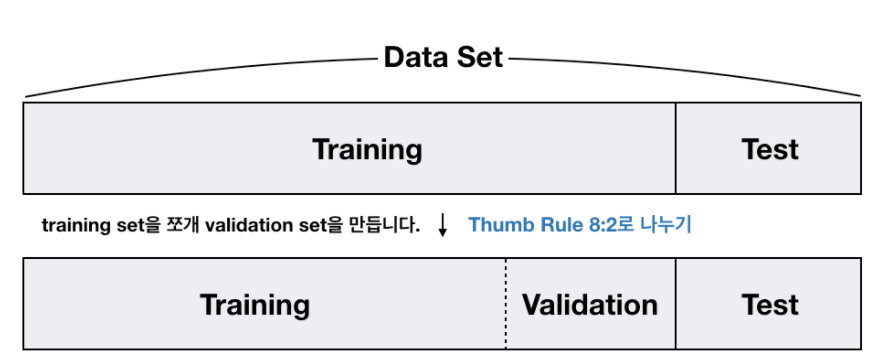

### Validation Set vs. Test Set
validation set은 모델을 만드는 과정, 여러 모델 중 가장 나은 모델을 선택하는 상황과 같이 최종적으로 머신러닝 모델이 나오기 전에 활용하는 성능평가용 데이터 입니다. 즉 목적은 ‘성능 가늠’입니다.
test set은 모델 선택이 끝난 후 최종적으로 머신러닝 모델의 성능을 측정하는 데이터입니다. 목적은 ‘성능 최종 평가’입니다.
test은 모델의 성능을 개선하기 위한 용도로 사용할 수 없으며 어떠한 경우에도 학습에 영향을 주어서는 안됩니다. 모델 제작과는 완전히 분리되어 성능 평가 그 자체만을 위해 완전히 분리해 둔 데이터라고 할 수 있습니다.import pandas as pd

df = pd.read_csv('data/train.csv')

In [5]:
import pandas as pd

df = pd.read_csv('data/train.csv')



In [7]:

# 테스트셋
df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:

# 전체 나이 평균, 즉 df['Age'].mean()을 빈칸에 넣기
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [9]:
# 테스트셋에도 똑같이 적용해야함
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean());
# 마지막에 ; 을 뒤에 붙이면 out에 결과표시 생략

In [10]:
df.loc[df['Age'] < 10, 'Age'] = 0
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5

In [11]:

df_test.loc[df['Age'] < 10, 'Age'] = 0
df_test.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df_test.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df_test.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df_test.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df_test.loc[df['Age'] >= 50, 'Age'] = 5

In [12]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


In [13]:
# 테스트셋도 똑같이 적용
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

In [14]:
# 더이상 필요 없는 열은 버리고, 필요한 필드만 남기기
train = df[['Survived', 'Sex', 'Age', 'FamilySize']]
test = df_test[['Sex', 'Age', 'FamilySize']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize
0,0,male,2.0,1
1,1,female,3.0,1
2,1,female,2.0,0
3,1,female,3.0,1
4,0,male,3.0,0


In [15]:

# 운임도 빈칸(NaN)을 운임평균으로 채우기
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [16]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

In [19]:
# 필요한 필드만 남기기
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,male,2.0,1,7.2500,S
1,1,female,3.0,1,71.2833,C
2,1,female,2.0,0,7.9250,S
3,1,female,3.0,1,53.1000,S
4,0,male,3.0,0,8.0500,S


In [20]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,S,0


In [21]:
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,0,0


In [22]:

train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,0,2.0,1,7.2500,0
1,1,1,3.0,1,71.2833,1
2,1,1,2.0,0,7.9250,0
3,1,1,3.0,1,53.1000,0
4,0,0,3.0,0,8.0500,0


In [23]:

x_train = train[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
y_train = train['Survived'] # 선택할 열이 하나면, []를 한번만 써주세요.

x_train

,Sex,Age,FamilySize,Fare,Embarked
0,0,2.0,1,7.2500,0
1,1,3.0,1,71.2833,1
2,1,2.0,0,7.9250,0
3,1,3.0,1,53.1000,0
4,0,3.0,0,8.0500,0
...,...,...,...,...,...
886,0,2.0,0,13.0000,0
887,1,1.0,0,30.0000,0
888,1,2.0,3,23.4500,0
889,0,2.0,0,30.0000,1


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))

training set accuracy: 0.9450056116722784


In [25]:
x_test = test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
# 사실 이 작업을 안해도 test와 동일하기 때문에 생략해도 됩니다.

x_test

,Sex,Age,FamilySize,Fare,Embarked
0,0,0.0,0,7.8292,2
1,1,0.0,1,7.0000,0
2,0,0.0,0,9.6875,2
3,0,0.0,0,8.6625,0
4,1,0.0,2,12.2875,0
...,...,...,...,...,...
413,0,0.0,0,8.0500,0
414,1,0.0,0,108.9000,1
415,0,0.0,0,7.2500,0
416,0,0.0,0,8.0500,0


In [26]:
prediction = tree.predict(x_test) # 즉 y_test가 만들어집니다.
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:

submit = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': prediction
})

submit.to_csv('submit.csv', index=False)

In [28]:

my_prediction = pd.read_csv('submit.csv')
my_prediction.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


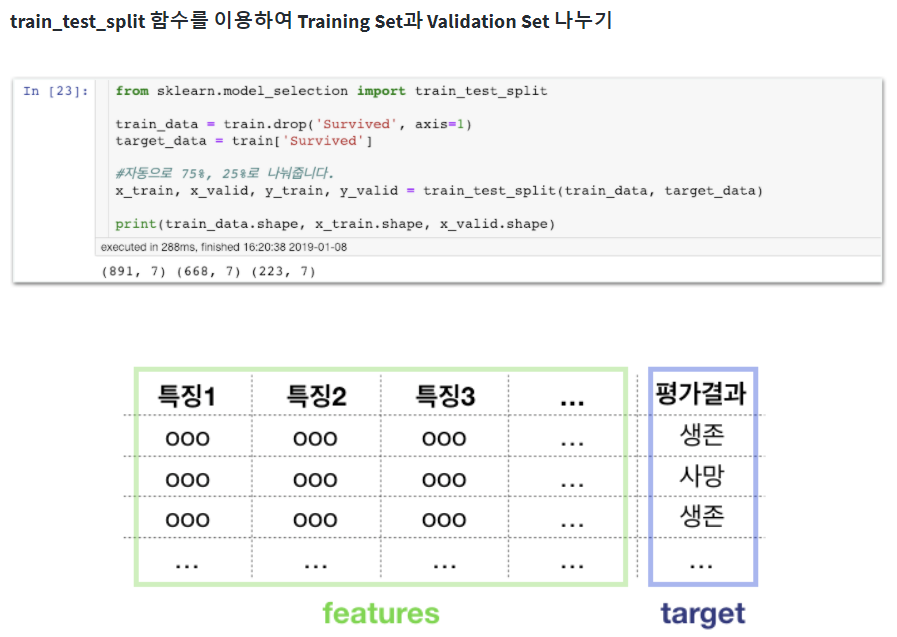

- scikit-learn에 학습데이터를 넣을 때는 feature 데이터와 target 데이터를 분류해서 넣습니다.
(대다수의 머신러닝 라이브러리들이 채택한 방법)
- train data와 valid data를 나누는 비율 : 
8:2 정도면 적당하다고 알려져 있습니다. 7:3, 9:1도 괜찮습니다. 특수한 경우가 아니라면 8:2 전후에서 처리하시면 됩니다.
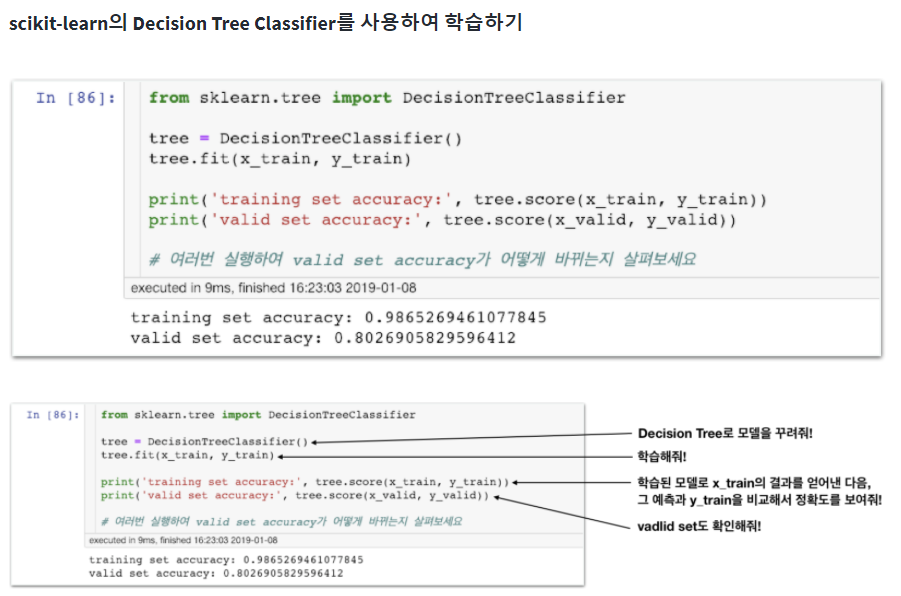

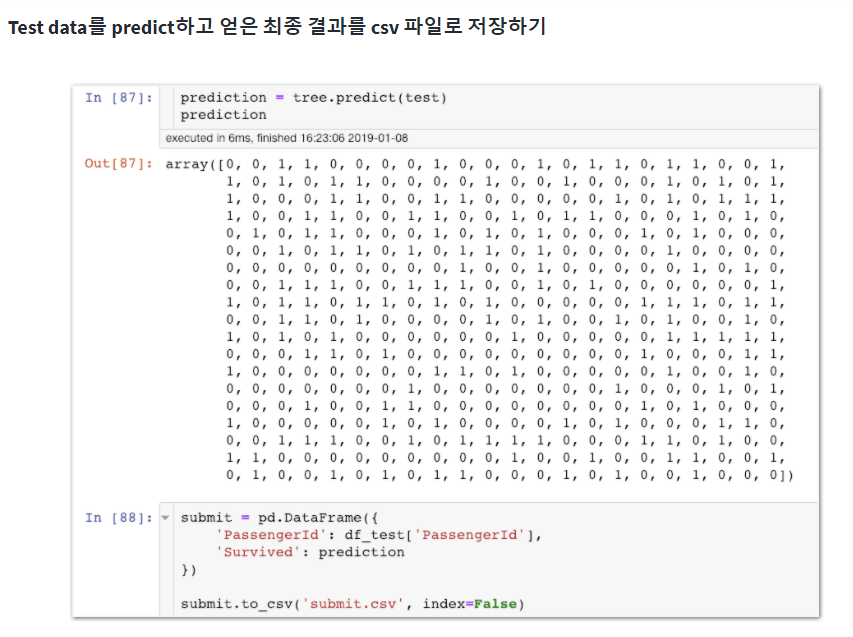

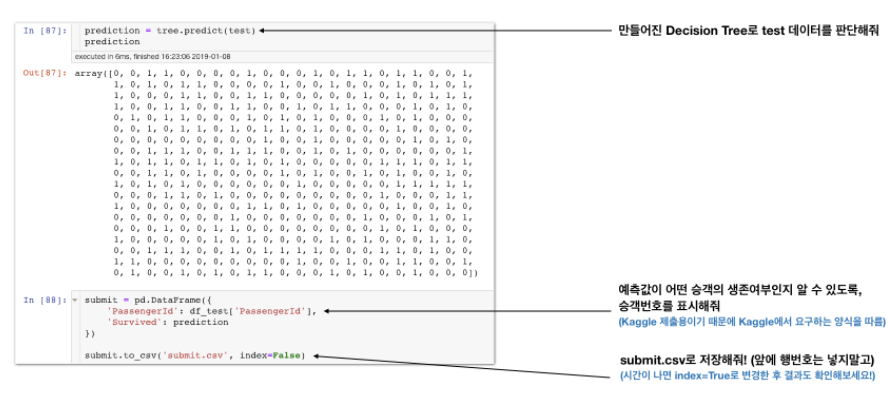

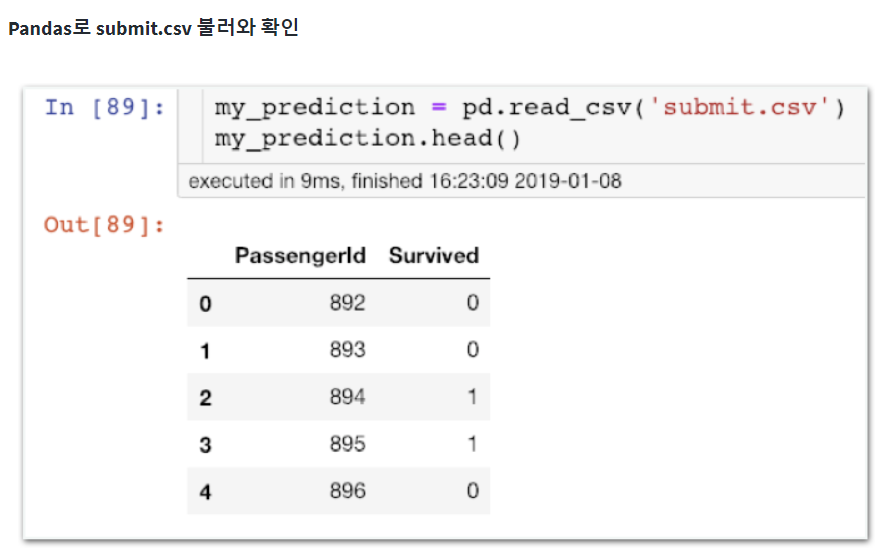

### 분석 노하우로 학습 성공률 높이기
- Count Plot으로 Age에 따른 생존여부 히스토그램 얻기


In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

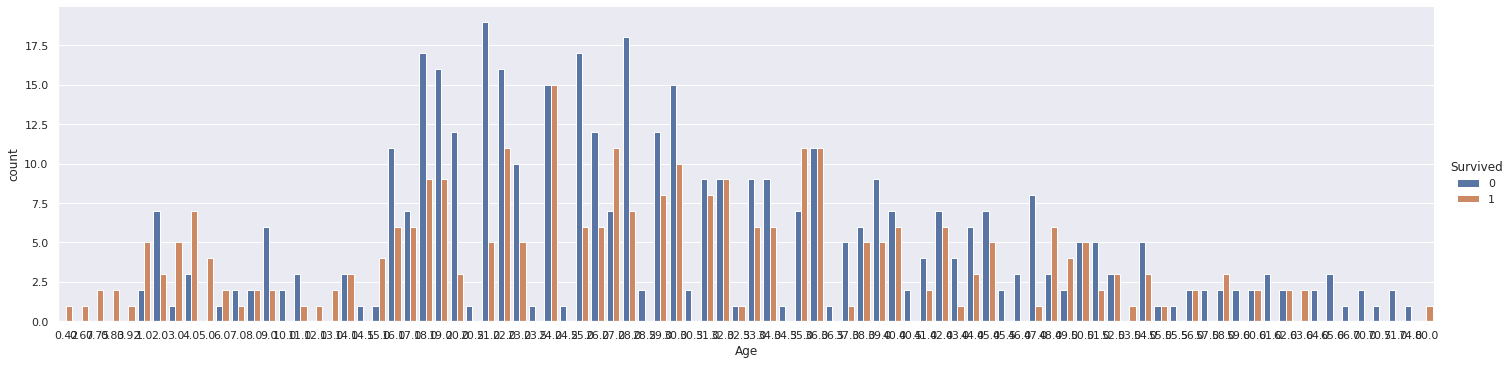

In [31]:
sns.catplot(data=df, x='Age', hue='Survived', kind='count', aspect=4)

- kdeplot을 사용하여 매끄러운 곡선 분포도 얻기

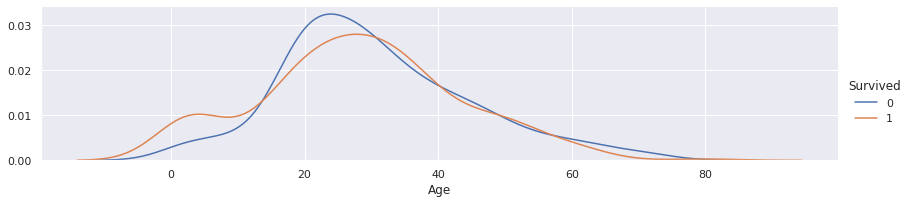

In [32]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()

plt.show()